#### 2012
- AlexNet

#### 2013
- ZFNet(Visaulization : 진단을 통해)
- NIN (1 x 1, stacking, GAP)

#### 2014
- VGG / GoogLeNet

In [1]:
import tensorflow as tf

In [2]:
input_ = tf.keras.Input((227,227,3)) # 논문에는 224 로 나와 있지만 data augmentation 으로 실제 227

## Alexnet

In [3]:
import tensorflow_addons as tfa

In [4]:
x = tf.keras.layers.Conv2D(96, 11, 4)(input_)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu', bias_initializer='ones')(x)
x = tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4096)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='softmax')(x)

In [5]:
model = tf.keras.Model(input_,x)

In [6]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tfa.optimizers.SGDW(weight_decay=0.0005, momentum=0.9))

In [7]:
tf.keras.initializers.GlorotNormal

keras.initializers.initializers_v2.GlorotNormal

In [8]:
len(model.layers)

15

In [9]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(11, 11, 3, 96) dtype=float32, numpy=
 array([[[[-1.52418390e-04,  1.00820456e-02,  2.04751622e-02, ...,
            1.22970250e-02, -1.52721424e-02,  2.09042989e-03],
          [ 7.71890022e-03,  9.60513018e-03, -7.76217971e-03, ...,
            3.53187323e-04, -1.49232671e-02,  1.25889461e-02],
          [-1.29363481e-02, -6.58255070e-04, -1.66764427e-02, ...,
            1.15738157e-02, -8.24640412e-03, -1.53748691e-02]],
 
         [[-1.38125010e-03,  2.20015850e-02, -1.84209645e-02, ...,
            1.45575609e-02,  5.28144091e-03,  1.88335013e-02],
          [ 1.48694832e-02,  1.21379476e-02,  7.56875984e-03, ...,
            1.04423184e-02, -1.44291436e-02, -9.54023656e-03],
          [-7.71049596e-03,  2.20982749e-02,  1.47452261e-02, ...,
           -2.11601332e-02,  1.82668474e-02,  1.18646603e-02]],
 
         [[ 1.02259237e-02, -7.57179037e-03, -3.62734310e-03, ...,
            7.65419751e-03, -2.13651378e-02,  1.64423380e-02],
        

In [10]:
model.weights[0][...,0] #

<tf.Tensor: shape=(11, 11, 3), dtype=float32, numpy=
array([[[-1.52418390e-04,  7.71890022e-03, -1.29363481e-02],
        [-1.38125010e-03,  1.48694832e-02, -7.71049596e-03],
        [ 1.02259237e-02, -2.02437863e-04,  1.66459959e-02],
        [-1.31367687e-02, -1.63512118e-02, -9.36905574e-03],
        [-1.56050315e-02, -2.08480656e-02, -5.90702891e-03],
        [-1.13388896e-03, -1.76273845e-03,  2.08238605e-02],
        [-2.07282379e-02,  8.95631500e-03, -5.45898639e-03],
        [ 1.61771383e-02,  1.21429507e-02,  1.38962362e-02],
        [-6.79058582e-03,  1.88673045e-02, -2.07305644e-02],
        [-1.88272372e-02, -1.58680156e-02, -1.11993514e-02],
        [ 4.31954861e-03,  9.05013643e-03,  1.18002724e-02]],

       [[-5.69555350e-03,  7.87716731e-03, -9.41879209e-03],
        [-6.25069812e-03,  2.13830788e-02, -1.52377523e-02],
        [ 1.30319986e-02,  9.54560377e-03,  1.62036512e-02],
        [-6.12331368e-03,  7.48324580e-03,  9.59089957e-03],
        [ 1.13006867e-03, -1.7

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120

## Alexnet 2

In [12]:
x = tf.keras.layers.Conv2D(48, 11, 4)(input_)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
xx = tf.keras.layers.Conv2D(128, 5, padding='same')(x)

y = tf.keras.layers.Conv2D(48, 11, 4)(input_)
y = tf.keras.layers.MaxPool2D(3, 2)(y)
yy = tf.keras.layers.Conv2D(128, 5, padding='same')(y)

i = tf.keras.layers.Concatenate()([xx,yy])
i = tf.keras.layers.Conv2D(192, 3, padding='same')(i)
i = tf.keras.layers.Conv2D(192, 3, padding='same')(i)
i = tf.keras.layers.Conv2D(128, 3, padding='same')(i)
i = tf.keras.layers.MaxPool2D(3, 2)(i)
i = tf.keras.layers.Flatten()(i)

j = tf.keras.layers.Concatenate()([xx,yy])
j = tf.keras.layers.Conv2D(192, 3, padding='same')(j)
j = tf.keras.layers.Conv2D(192, 3, padding='same')(j)
j = tf.keras.layers.Conv2D(128, 3, padding='same')(j)
j = tf.keras.layers.MaxPool2D(3, 2)(j)
j = tf.keras.layers.Flatten()(j)

k = tf.keras.layers.Concatenate()([i,j])
k = tf.keras.layers.Dense(2048)(k)

l = tf.keras.layers.Concatenate()([i,j])
l = tf.keras.layers.Dense(2048)(l)

m = tf.keras.layers.Concatenate()([k,l])
m = tf.keras.layers.Dense(2048)(m)

n = tf.keras.layers.Concatenate()([k,l])
n = tf.keras.layers.Dense(2048)(n)

t = tf.keras.layers.Concatenate()([n,m])
t = tf.keras.layers.Dense(1000, activation='softmax')(t)

In [13]:
model2 = tf.keras.Model(input_, t)

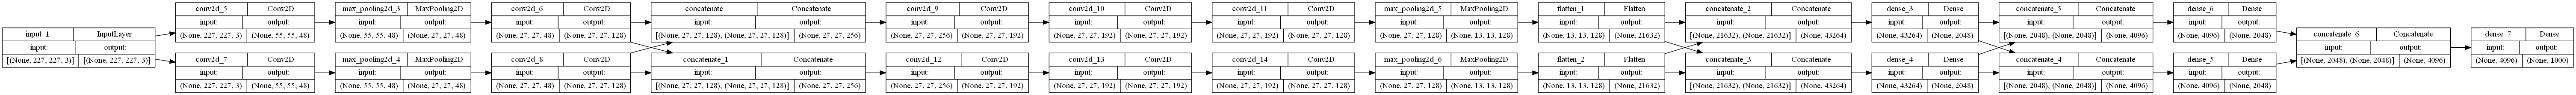

In [14]:
tf.keras.utils.plot_model(model2, rankdir='LR', show_shapes=True)

In [15]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 55, 55, 48)   17472       ['input_1[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 55, 55, 48)   17472       ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 27, 27, 48)  0           ['conv2d_5[0][0]']         

### Visualizations 논문
### ZFnet

In [16]:
x = tf.keras.layers.Conv2D(96, 7, 2)(input_)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu', bias_initializer='ones')(x)
x = tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4096)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='softmax')(x)

### NIN

In [17]:
x = tf.keras.layers.Conv2D(96, 11, 4)(input_)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Conv2D(256, 5, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
x = tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu', bias_initializer='ones')(x)
x = tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPool2D(3, 2)(x)
# x = tf.keras.layers.Flatten()(x) # 6 x6 x 256 = 9216
x = tf.keras.layers.GlobalAveragePooling2D()(x) # layer 수 만큰만 늘어남 256개

# x = tf.keras.layers.Dense(4096)(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(4096)(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(1000, activation='softmax')(x)

In [18]:
model3 = tf.keras.Model(input_, x)

In [19]:
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 384)       8851